In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, structural_similarity as ssim

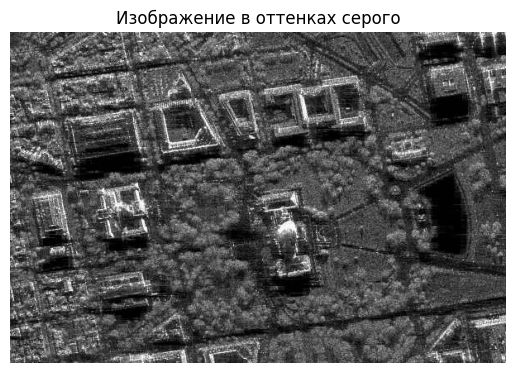

In [ ]:
# 1. загрузка изображения
image_path = 'sar_1_gray.jpg'
img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img_gray is None:
    raise FileNotFoundError(f"Изображение {image_path} не найдено!")

plt.imshow(img_gray, cmap='gray')
plt.title('Изображение в оттенках серого')
plt.axis('off')
plt.show()

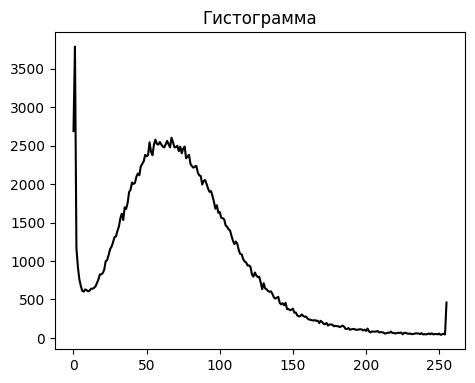

In [10]:
# 2. гистограмма
fig = plt.figure(figsize=(18, 14))

histSize = 256
histRange = (0, 256)
b_hist = cv2.calcHist([img_gray], [0], None, [histSize], histRange)
plt.subplot(3, 3, 2)
plt.plot(b_hist, color='black')
plt.title('Гистограмма')
plt.show()

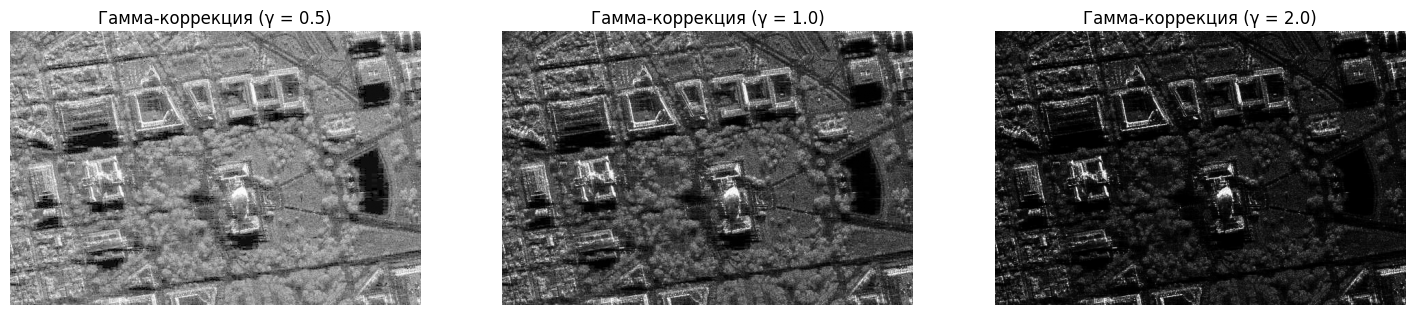

In [12]:
# 3. гамма-коррекция
def gamma_correction(image, gamma):
    image_normalized = image.astype(np.float32) / 255.0
    corrected = np.power(image_normalized, gamma)
    return np.uint8(corrected * 255)

gamma_low = 0.5
gamma_static = 1.0
gamma_high = 2.0

img_gamma_low = gamma_correction(img_gray, gamma_low)
img_gamma_static = gamma_correction(img_gray, gamma_static)
img_gamma_high = gamma_correction(img_gray, gamma_high)

plt.figure(figsize=(18, 14))
plt.subplot(3, 3, 4)
plt.imshow(img_gamma_low, cmap='gray')
plt.title(f'Гамма-коррекция (γ = {gamma_low})')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(img_gamma_static, cmap='gray')
plt.title(f'Гамма-коррекция (γ = {gamma_static})')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(img_gamma_high, cmap='gray')
plt.title(f'Гамма-коррекция (γ = {gamma_high})')
plt.axis('off')

plt.show()


In [21]:
# 4. сравнение по MSE и SSIM
def compare_images(img1, img2, title):
    mse_val = mean_squared_error(img1, img2)
    ssim_val = ssim(img1, img2, data_range=255)
    print(f"{title}\nMSE: {mse_val:.2f}, SSIM: {ssim_val:.4f}")
    return mse_val, ssim_val

res1 = compare_images(img_gray, img_gamma_low, "Исходное и γ = 0.5")
res2 = compare_images(img_gray, img_gamma_high, "Исходное и γ = 2.0")

Исходное и γ = 0.5
MSE: 3250.43, SSIM: 0.7875
Исходное и γ = 2.0
MSE: 2383.76, SSIM: 0.5270


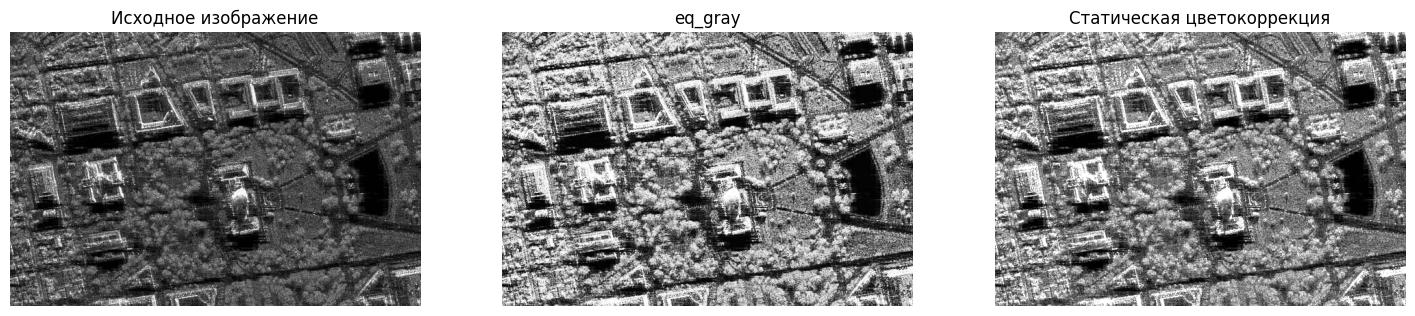

In [30]:
# 5. статическая цветокоррекция
def statistical_correction(image, reference_image):
    current_mean = np.mean(image)
    current_std = np.std(image)
    
    ref_mean = np.mean(reference_image)
    ref_std = np.std(reference_image)
    
    corrected = (image - current_mean) * (ref_std / current_std) + ref_mean
    corrected = np.clip(corrected, 0, 255)
    
    return corrected.astype(np.uint8)

eq_gray = cv2.equalizeHist(img_gray)
image_stat_corrected = statistical_correction(img_gray, eq_gray)

plt.figure(figsize=(18, 14))
plt.subplot(3, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.subplot(3, 3, 2)
plt.imshow(eq_gray, cmap='gray')
plt.title('eq_gray')
plt.axis('off')
plt.subplot(3, 3, 3)
plt.imshow(image_stat_corrected, cmap='gray')
plt.title('Статическая цветокоррекция')
plt.axis('off')
plt.show()

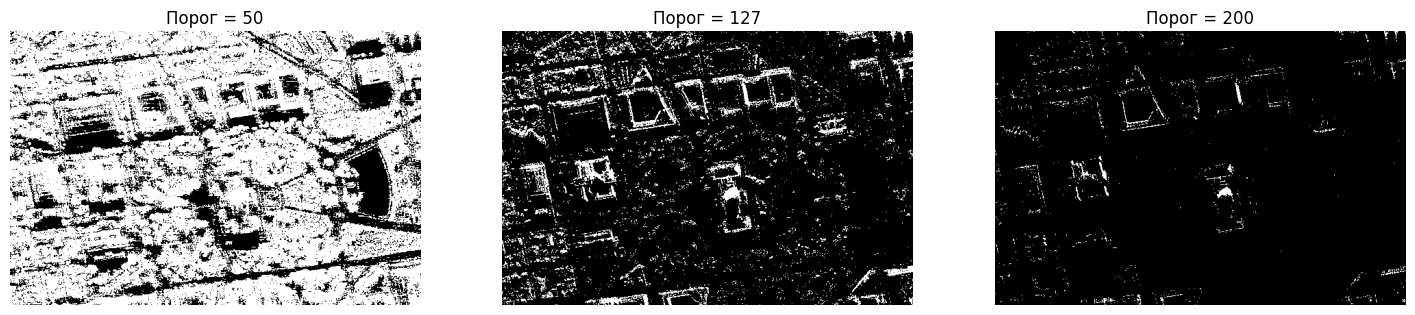

In [32]:
# 6. пороговая фильтрация
thresholds = [50, 127, 200]

plt.figure(figsize=(18, 14))

for i, thresh in enumerate(thresholds):
    _, img_thresh = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_BINARY)
    plt.subplot(3, 3, 1 + i)
    plt.imshow(img_thresh, cmap='gray')
    plt.title(f'Порог = {thresh}')
    plt.axis('off')

plt.show()